<a href="https://colab.research.google.com/github/priyanka77-priya/Diabets-prediction/blob/main/Diabets_prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler


In [2]:
import pandas as pd
diab_data=pd.read_csv("/content/diabetes (1).csv")
diab_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diab_data['Pregnancies'] = diab_data['Pregnancies'].replace(0, diab_data['Pregnancies'].mean())
diab_data['Glucose'] = diab_data['Glucose'].replace(0, diab_data['Glucose'].mean())      
diab_data['BloodPressure'] = diab_data['BloodPressure'].replace(0, diab_data['BloodPressure'].mean())   
diab_data['SkinThickness'] = diab_data['SkinThickness'].replace(0, diab_data['SkinThickness'].mean())   
diab_data['Insulin'] = diab_data['Insulin'].replace(0, diab_data['Insulin'].mean())   
diab_data['BMI'] = diab_data['BMI'].replace(0, diab_data['BMI'].mean())   
diab_data['DiabetesPedigreeFunction'] = diab_data['DiabetesPedigreeFunction'].replace(0, diab_data['DiabetesPedigreeFunction'].mean())   
diab_data['Age'] = diab_data['Age'].replace(0, diab_data['Age'].mean())

In [4]:
diab_data.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [5]:
diab_data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [6]:
diab_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [7]:
diab_data.shape

(768, 9)

In [8]:
diab_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
grouped=diab_data.groupby("Outcome")
grouped["Glucose"].agg(np.mean)


Outcome
0    110.705367
1    142.159661
Name: Glucose, dtype: float64

In [10]:
grouped=diab_data.groupby("Outcome")
grouped["BMI"].agg(np.mean)

Outcome
0    30.880066
1    35.381288
Name: BMI, dtype: float64

In [11]:
diab_data.corr().head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.152568,0.253275,0.045776,-0.016738,0.097663,-0.010297,0.525261,0.247971
Glucose,0.152568,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.253275,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.045776,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.016738,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.097663,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.010297,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.525261,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.247971,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


Text(0.5, 1.0, ' \n Scatter plot between Glucose and Outcome \n')

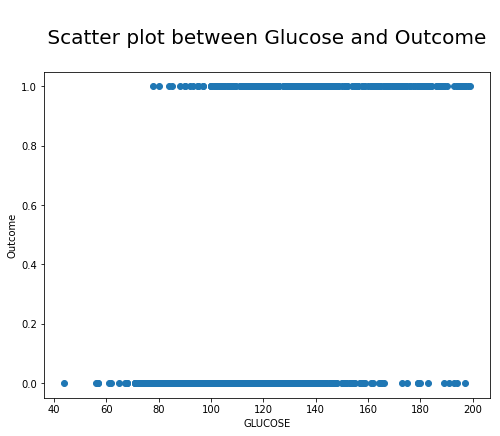

In [12]:
plt.figure(figsize=(8,6))
x=diab_data["Glucose"]
y=diab_data["Outcome"]
plt.scatter(x,y)
plt.xlabel("GLUCOSE")
plt.ylabel("Outcome")
plt.title(" \n Scatter plot between Glucose and Outcome \n",fontsize = 20)


Text(0.5, 1.0, ' \n Scatter plot between BMI and OUTCOME \n')

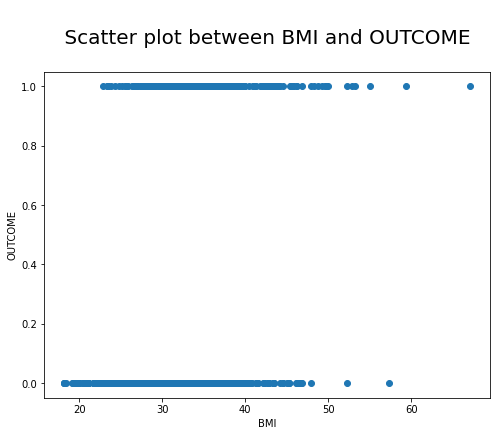

In [13]:
plt.figure(figsize=(8, 6))
x=diab_data["BMI"]
y=diab_data["Outcome"]
plt.scatter(x,y)
plt.xlabel("BMI")
plt.ylabel("OUTCOME")
plt.title(" \n Scatter plot between BMI and OUTCOME \n",fontsize=20)

<Axes: title={'center': '\n Correlation between features \n\n'}>

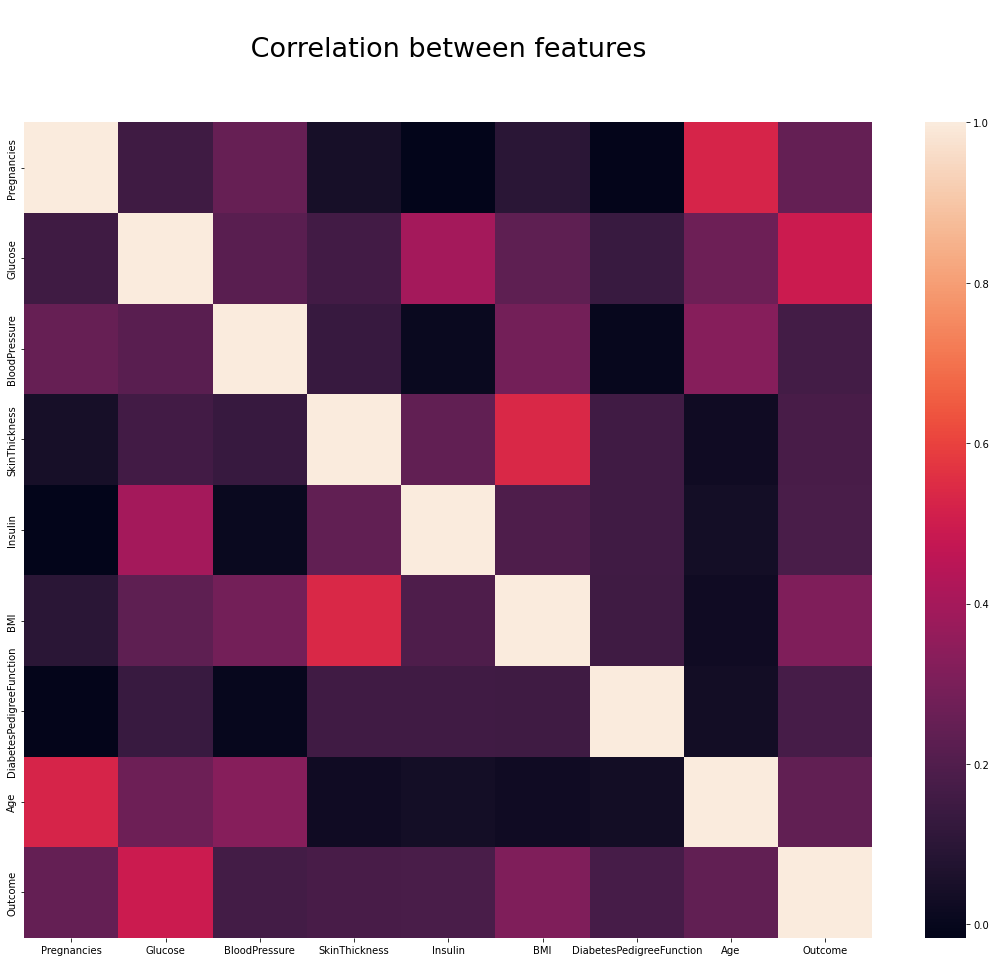

In [14]:
plt.figure(figsize = (19, 15))
plt.title("\n Correlation between features \n\n",fontsize=27)
sns.heatmap(diab_data.corr())
     

<Axes: xlabel='Outcome', ylabel='Glucose'>

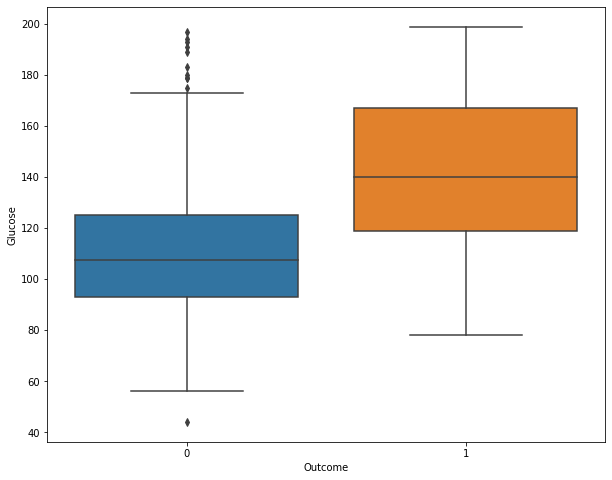

In [15]:
plt.figure(figsize = (10, 8))
sns.boxplot(x="Outcome",y="Glucose", data=diab_data)
     

<Axes: xlabel='Outcome', ylabel='BMI'>

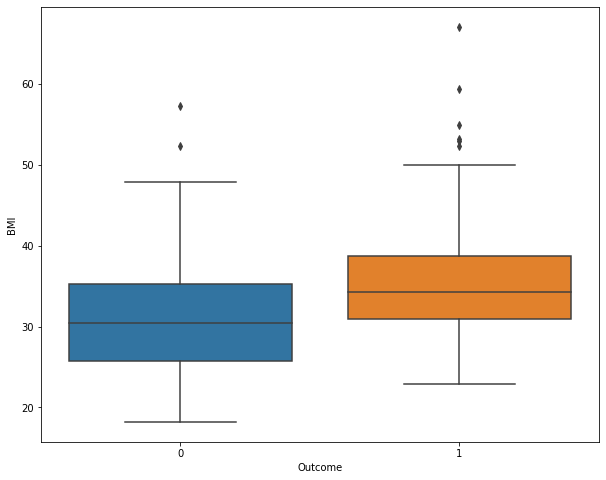

In [16]:
plt.figure(figsize = (10, 8))
sns.boxplot(x="Outcome",y="BMI", data=diab_data)

<ipython-input-17-eba0af6c4d03>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diab_data["Pregnancies"][diab_data["Outcome"] == 1])


Text(0.5, 1.0, 'Pregnancies \n')

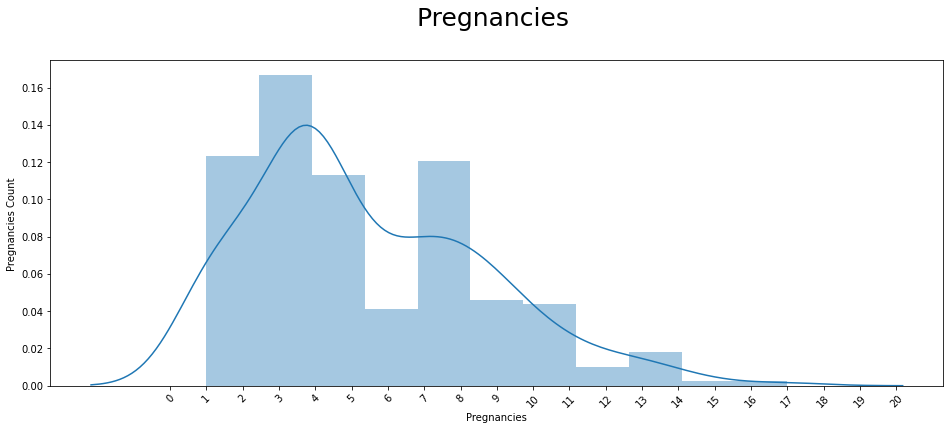

In [17]:
fig = plt.figure(figsize =(16,6))

sns.distplot(diab_data["Pregnancies"][diab_data["Outcome"] == 1])
plt.xticks([i for i in range(0,21,1)],rotation = 45)
plt.ylabel("Pregnancies Count ")
plt.title("Pregnancies \n",fontsize = 25)

<ipython-input-18-c34e4eae3d1f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diab_data["Glucose"][diab_data["Outcome"] == 1])


Text(0.5, 1.0, 'Glucose \n')

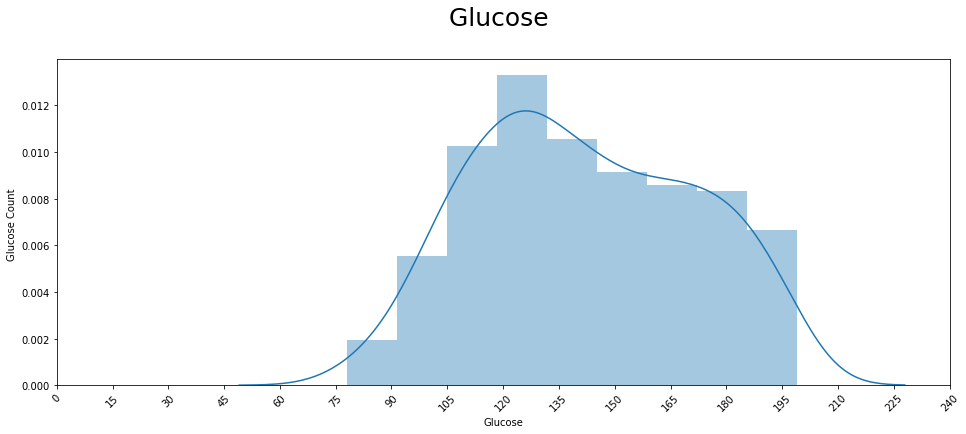

In [18]:
fig = plt.figure(figsize =(16,6))

sns.distplot(diab_data["Glucose"][diab_data["Outcome"] == 1])
plt.xticks([i for i in range(0,246,15)],rotation = 45)
plt.ylabel("Glucose Count ")
plt.title("Glucose \n",fontsize = 25)

<ipython-input-19-6d344d41a9df>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diab_data["BloodPressure"][diab_data["Outcome"] == 1])


Text(0.5, 1.0, 'Blood Pressure \n')

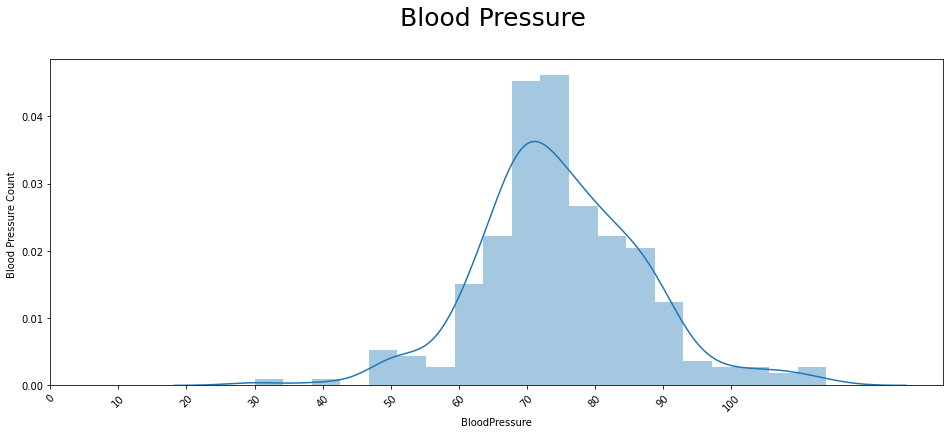

In [19]:
fig = plt.figure(figsize =(16,6))

sns.distplot(diab_data["BloodPressure"][diab_data["Outcome"] == 1])
plt.xticks([i for i in range(0,101,10)],rotation = 45)
plt.ylabel("Blood Pressure Count ")
plt.title("Blood Pressure \n",fontsize = 25)

<ipython-input-20-b80495ae716b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diab_data["SkinThickness"][diab_data["Outcome"] == 1])


Text(0.5, 1.0, 'SkinThickness \n')

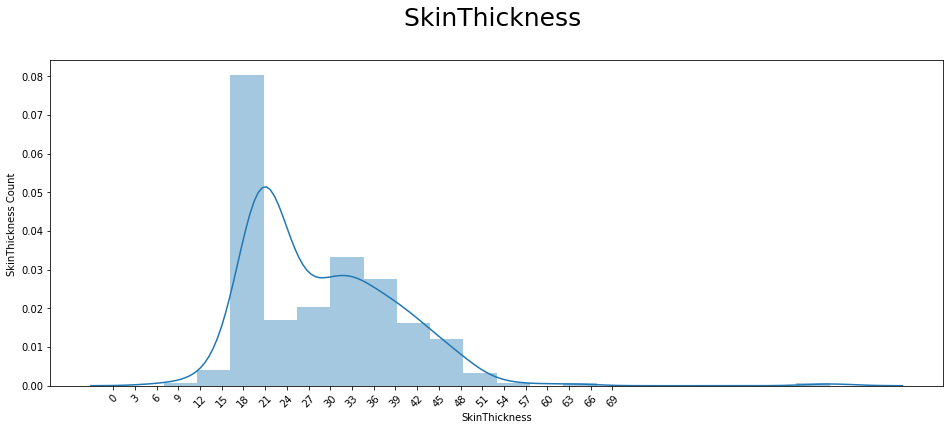

In [20]:
fig = plt.figure(figsize =(16,6))

sns.distplot(diab_data["SkinThickness"][diab_data["Outcome"] == 1])
plt.xticks([i for i in range(0,71,3)],rotation = 45)
plt.ylabel("SkinThickness Count ")
plt.title("SkinThickness \n",fontsize = 25)
     

<ipython-input-21-2ca897169b94>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diab_data["Insulin"][diab_data["Outcome"] == 1])


Text(0.5, 1.0, 'Insulin \n')

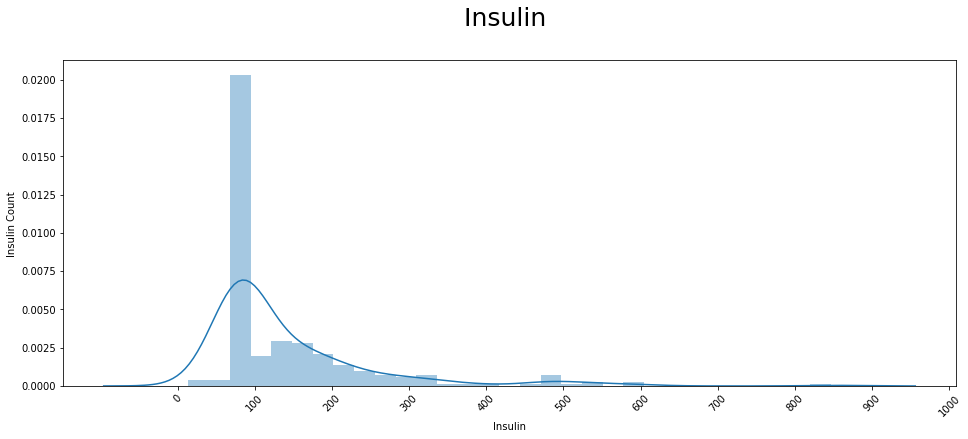

In [ ]:
fig = plt.figure(figsize =(16,6))

sns.distplot(diab_data["Insulin"][diab_data["Outcome"] == 1])
plt.xticks([i for i in range(0,1001,100)],rotation = 45)
plt.ylabel("Insulin Count ")
plt.title("Insulin \n",fontsize = 25)

<ipython-input-22-2352dd4d2816>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diab_data["BMI"][diab_data["Outcome"] == 1])


Text(0.5, 1.0, 'BMI \n')

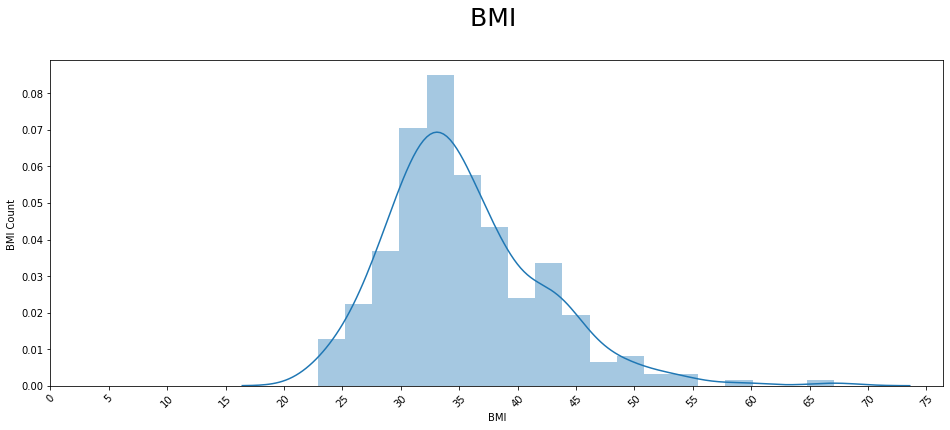

In [ ]:
fig = plt.figure(figsize =(16,6))

sns.distplot(diab_data["BMI"][diab_data["Outcome"] == 1])
plt.xticks([i for i in range(0,76,5)],rotation = 45)
plt.ylabel("BMI Count ")
plt.title("BMI \n",fontsize = 25)

<ipython-input-23-58db30ffc3a3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diab_data["DiabetesPedigreeFunction"][diab_data["Outcome"] == 1])


Text(0, 0.5, 'DiabetesPedigreeFunction\t Count ')

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


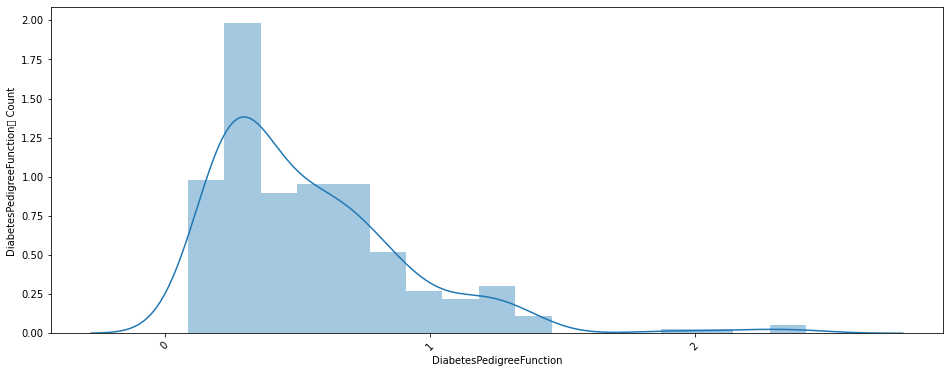

In [ ]:
fig = plt.figure(figsize =(16,6))

sns.distplot(diab_data["DiabetesPedigreeFunction"][diab_data["Outcome"] == 1])
plt.xticks([i for i in range(0,3,1)],rotation = 45)
plt.ylabel("DiabetesPedigreeFunction	 Count ")

<ipython-input-24-6f0f08b0eb48>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diab_data["Age"][diab_data["Outcome"] == 1])


Text(0, 0.5, 'Age Count ')

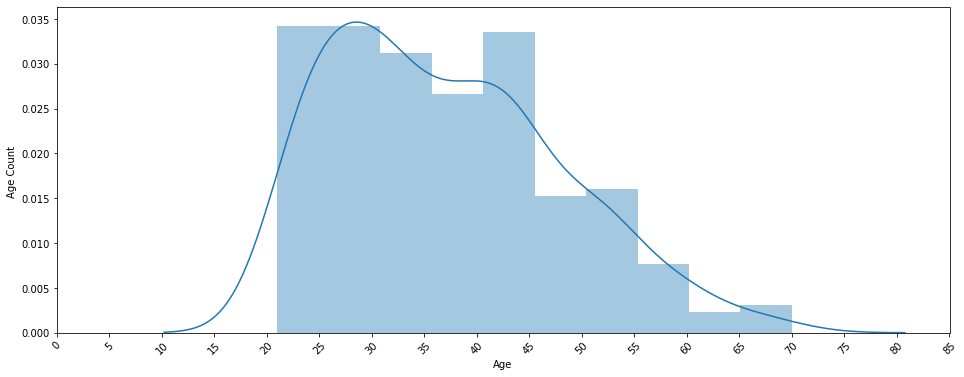

In [ ]:
fig = plt.figure(figsize =(16,6))

sns.distplot(diab_data["Age"][diab_data["Outcome"] == 1])
plt.xticks([i for i in range(0,86,5)],rotation = 45)
plt.ylabel("Age Count ")
     

In [ ]:
diab_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [ ]:
diab_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
X = diab_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [ ]:
X.shape

(768, 8)

In [ ]:
y=diab_data['Outcome']

In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
y.shape

(768,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
print("X_train size:", X_train.shape)
print("y_train size: ",y_train.shape,"\n")
print("X_test size:", X_test.shape)
print("y_test size:",y_test.shape)

X_train size: (614, 8)
y_train size:  (614,) 

X_test size: (154, 8)
y_test size: (154,)


In [ ]:
scaler =MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[0.57142857, 0.65584416, 0.57142857, ..., 0.40286299, 0.24632517,
        0.37254902],
       [0.64285714, 0.55194805, 0.3877551 , ..., 0.47034765, 0.15902004,
        0.33333333],
       [0.42857143, 0.37662338, 0.51020408, ..., 0.38854806, 0.05345212,
        0.47058824],
       ...,
       [0.85714286, 0.53246753, 0.67346939, ..., 0.51533742, 0.22227171,
        0.41176471],
       [0.21428571, 0.82467532, 0.48979592, ..., 0.5194274 , 0.17594655,
        0.09803922],
       [0.57142857, 0.37662338, 0.53061224, ..., 0.3006135 , 0.25879733,
        0.49019608]])

In [ ]:
X_test

array([[0.42857143, 0.5974026 , 0.51020408, ..., 0.1595092 , 0.25077951,
        0.58823529],
       [0.        , 0.69480519, 0.36734694, ..., 0.16155419, 0.04231626,
        0.01960784],
       [0.35714286, 0.42207792, 0.36734694, ..., 0.1390593 , 0.05434298,
        0.11764706],
       ...,
       [0.5       , 0.93506494, 0.55102041, ..., 0.60736196, 0.02360802,
        0.43137255],
       [0.28571429, 0.5974026 , 0.59183673, ..., 0.28205681, 0.24766147,
        0.94117647],
       [0.21428571, 0.2987013 , 0.46025989, ..., 0.200409  , 0.23429844,
        0.19607843]])

In [ ]:
y_train

663    1
712    1
161    0
509    0
305    0
      ..
645    0
715    1
72     1
235    1
37     1
Name: Outcome, Length: 614, dtype: int64

In [ ]:
y_test

285    0
101    0
581    0
352    0
726    0
      ..
563    0
318    0
154    1
684    0
643    0
Name: Outcome, Length: 154, dtype: int64

In [ ]:
model_DT = DecisionTreeClassifier(max_depth=3)
model_DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
predict_DT=model_DT.predict(X_test)

In [ ]:
Actual_predicted_DT=pd.DataFrame({'Actual':y_test, 'predicted':predict_DT})

In [ ]:
Actual_predicted_DT

,Actual,predicted
285,0,0
101,0,1
581,0,0
352,0,0
726,0,0
...,...,...
563,0,0
318,0,0
154,1,1
684,0,1


In [ ]:
pd.DataFrame(
confusion_matrix(y_test,predict_DT),
columns=['NonDiabetic Predicted', 'Diabetic predicted'],
index=['NonDiabetic', 'Diabetic']
)

,NonDiabetic Predicted,Diabetic predicted
NonDiabetic,84,15
Diabetic,19,36


In [ ]:
print("Recall " ,metrics.recall_score(y_test, predict_DT,pos_label=1))
print("Precision  ",metrics.precision_score(y_test, predict_DT,pos_label=1))
print("f1_score " ,metrics.f1_score(y_test, predict_DT,pos_label=1))
     

Recall  0.6545454545454545
Precision   0.7058823529411765
f1_score  0.679245283018868


In [ ]:
model_lr = LogisticRegression(class_weight='balanced')
model_lr.fit(X_train,y_train)
     

LogisticRegression(class_weight='balanced')

In [ ]:
predict_LR = model_lr.predict(X_test)

In [ ]:
Actual_predicted_LR=pd.DataFrame({'Actual':y_test,'predicted':predict_LR})
Actual_predicted_LR

,Actual,predicted
285,0,1
101,0,0
581,0,0
352,0,0
726,0,0
...,...,...
563,0,0
318,0,0
154,1,1
684,0,1


In [ ]:

pd.DataFrame(
confusion_matrix(y_test,predict_LR),
columns=['NonDiabetic Predicted', 'Diabetic predicted'],
index=['NonDiabetic', 'Diabetic']
)

,NonDiabetic Predicted,Diabetic predicted
NonDiabetic,77,22
Diabetic,12,43


In [ ]:
print("Recall " ,metrics.recall_score(y_test, predict_LR,pos_label=1))
print("Precision ",metrics.precision_score(y_test, predict_LR,pos_label=1))
print("f1_score " ,metrics.f1_score(y_test, predict_LR,pos_label=1))
     

Recall  0.7818181818181819
Precision  0.6615384615384615
f1_score  0.7166666666666666


In [ ]:
accuracy=metrics.accuracy_score(y_test, predict_LR)

In [ ]:
print(accuracy*100)

77.92207792207793


In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2,weights='uniform')
model_knn.fit(X_train,y_train)
y_predict_knn = model_knn.predict(X_test)

In [ ]:
Actual_predicted_knn=pd.DataFrame({'predicted':y_predict_knn, 'Actual':y_test})
Actual_predicted_knn

,predicted,Actual
285,1,0
101,0,0
581,0,0
352,0,0
726,0,0
...,...,...
563,0,0
318,0,0
154,1,1
684,1,0


In [ ]:
pd.DataFrame(
confusion_matrix(y_test,y_predict_knn),
columns=['NonDiabetic Predicted', 'Diabetic predicted'],
index=['NonDiabetic', 'Diabetic']
)
     


,NonDiabetic Predicted,Diabetic predicted
NonDiabetic,84,15
Diabetic,18,37


In [ ]:
print("Recall " ,metrics.recall_score(y_test, y_predict_knn,pos_label=1))
print("Precision ",metrics.precision_score(y_test, y_predict_knn,pos_label=1))
print("f1_score " ,metrics.f1_score(y_test,y_predict_knn,pos_label=1))


Recall  0.6727272727272727
Precision  0.7115384615384616
f1_score  0.6915887850467289


In [ ]:
metrics.accuracy_score(y_test, y_predict_knn)*100

78.57142857142857

In [ ]:
model_sv = SVC(random_state=1)
model_sv.fit(X_train,y_train)
y_predict_svc = model_sv.predict(X_test)

In [ ]:
Actual_predicted_svm=pd.DataFrame({'predicted':y_predict_svc, 'Actual':y_test})
Actual_predicted_svm

,predicted,Actual
285,0,0
101,0,0
581,0,0
352,0,0
726,0,0
...,...,...
563,0,0
318,0,0
154,1,1
684,0,0


In [ ]:
pd.DataFrame(
confusion_matrix(y_test,y_predict_svc),
columns=['NonDiabetic Predicted', 'Diabetic predicted'],
index=['NonDiabetic', 'Diabetic']
)

,NonDiabetic Predicted,Diabetic predicted
NonDiabetic,92,7
Diabetic,24,31


In [ ]:
print("Recall " ,metrics.recall_score(y_test, y_predict_svc,pos_label=1))
print("Precision  ",metrics.precision_score(y_test, y_predict_svc,pos_label=1))
print("f1_score " ,metrics.f1_score(y_test, y_predict_svc,pos_label=1))

Recall  0.5636363636363636
Precision   0.8157894736842105
f1_score  0.6666666666666666


In [ ]:
metrics.accuracy_score(y_test, y_predict_svc)*100

79.87012987012987

In [ ]:
model_nb = GaussianNB( )
model_nb.fit(X_train,y_train)
y_predict_nb=model_nb.predict(X_test)
     

In [ ]:
Actual_predicted_nv=pd.DataFrame({'predicted':y_predict_nb, 'Actual':y_test})
Actual_predicted_nv
     

,predicted,Actual
285,0,0
101,0,0
581,0,0
352,0,0
726,0,0
...,...,...
563,0,0
318,0,0
154,1,1
684,1,0


In [ ]:
pd.DataFrame(
confusion_matrix(y_test,y_predict_nb),
columns=['NonDiabetic Predicted', 'Diabetic predicted'],
index=['NonDiabetic', 'Diabetic']
)

,NonDiabetic Predicted,Diabetic predicted
NonDiabetic,82,17
Diabetic,21,34


In [ ]:
print("Recall " ,metrics.recall_score(y_test, predict_DT,pos_label=1))
print("Precision  ",metrics.precision_score(y_test, predict_DT,pos_label=1))
print("f1_score " ,metrics.f1_score(y_test, predict_DT,pos_label=1))
     

Recall  0.6545454545454545
Precision   0.7058823529411765
f1_score  0.679245283018868


In [ ]:
accuracy_nb = metrics.accuracy_score(y_test, y_predict_svc)*100
     

In [ ]:
accuracy_nb

79.87012987012987

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_model = AdaBoostClassifier(n_estimators=50,learning_rate=0.5,random_state=1)
     

In [ ]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.5, random_state=1)

In [ ]:
y_pred_ada=ada_model.predict(X_test)

In [ ]:
Actual_predicted_ada=pd.DataFrame({'predicted':y_pred_ada, 'Actual':y_test})
Actual_predicted_ada

,predicted,Actual
285,0,0
101,0,0
581,0,0
352,0,0
726,0,0
...,...,...
563,0,0
318,0,0
154,1,1
684,1,0


In [ ]:
pd.DataFrame(
confusion_matrix(y_test,y_pred_ada),
columns=['NonDiabetic Predicted', 'Diabetic predicted'],
index=['NonDiabetic', 'Diabetic']
)

,NonDiabetic Predicted,Diabetic predicted
NonDiabetic,87,12
Diabetic,18,37


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ada)*100)

Accuracy: 80.51948051948052


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=0)


In [ ]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred_rf=rf_model.predict(X_test)

In [ ]:
Actual_predicted_rf=pd.DataFrame({'predicted':y_pred_rf, 'Actual':y_test})
Actual_predicted_rf

,predicted,Actual
285,0,0
101,0,0
581,0,0
352,0,0
726,0,0
...,...,...
563,0,0
318,0,0
154,1,1
684,1,0


In [ ]:
pd.DataFrame(
confusion_matrix(y_test,y_pred_rf),
columns=['NonDiabetic Predicted', 'Diabetic predicted'],
index=['NonDiabetic', 'Diabetic']
)

,NonDiabetic Predicted,Diabetic predicted
NonDiabetic,88,11
Diabetic,17,38


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf)*100)

Accuracy: 81.81818181818183
